In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time
import webscraping

### Let's take a look at the top teams in the Bundesliga

In [3]:
#data collection
webscraping.get_bundTopGoals()

In [2]:
#data cleaning
df = pd.read_csv("bundTopGoals.csv")
df = df.head(n=6)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(6):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
print(df)

                 Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0        BayernMunich     25     62       42            175          429   
1    BorussiaDortmund     25     61       47            143          325   
2  EintrachtFrankfurt     25     50       37            123          289   
3      1899Hoffenheim     25     49       30            167          410   
4     BayerLeverkusen     25     46       35            149          363   
5   MönchengladbachB.     25     44       34            122          323   

   Goals/Game  
0        2.48  
1        2.44  
2        2.00  
3        1.96  
4        1.84  
5        1.76  


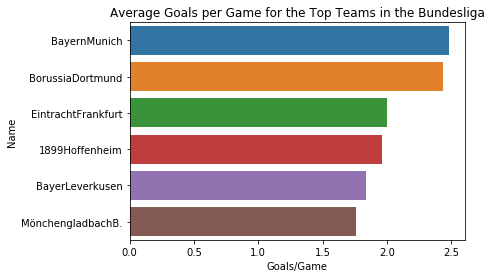

In [3]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in the Bundesliga')
plt.show()

In [4]:
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(6):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

                 Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0        BayernMunich     25     62       42            175          429   
1    BorussiaDortmund     25     61       47            143          325   
2  EintrachtFrankfurt     25     50       37            123          289   
3      1899Hoffenheim     25     49       30            167          410   
4     BayerLeverkusen     25     46       35            149          363   
5   MönchengladbachB.     25     44       34            122          323   

   Goals/Game  Shooting Accuracy(%)  Conversion Rate(%)  
0        2.48             40.792541           35.428571  
1        2.44             44.000000           42.657343  
2        2.00             42.560554           40.650407  
3        1.96             40.731707           29.341317  
4        1.84             41.046832           30.872483  
5        1.76             37.770898           36.065574  


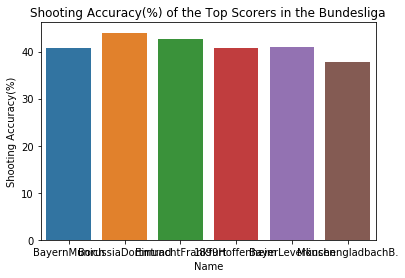

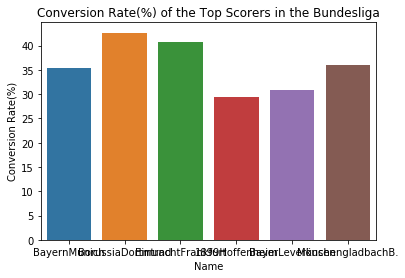

In [9]:
#visualization of top scorers' shooting accuracy and conversion rate
#df2 = df.sort_values(['Shooting Accuracy(%)'])
bar2 = sns.barplot(x='Name', y='Shooting Accuracy(%)', data=df)
plt.title('Shooting Accuracy(%) of the Top Scorers in the Bundesliga')
plt.show()

#df3 = df.sort_values(['Conversion Rate(%)'])
bar3 = sns.barplot(x='Name', y='Conversion Rate(%)', data=df)
plt.title('Conversion Rate(%) of the Top Scorers in the Bundesliga')
plt.show()